# Pneumonia Detection From X ray Using Transfer Learning
Diagnosing  Pneumonia from Pedriatic Chest X-Rays with Transfer Learning.


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [11]:

IMAGE_SIZE = [224, 224]

train_data = "C:/Users/admin/Desktop/datasets/chest_xray/xray_train"
valid_data = "C:/Users/admin/Desktop/datasets/chest_xray/xray_test"


In [9]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
  

58892288/58889256 [==============================] - 298s 5us/step


In [12]:
for layer in vgg.layers:
  layer.trainable = False


In [15]:
folders = glob('C:/Users/admin/Desktop/datasets/chest_xray/xray_train/*')
folders


['C:/Users/admin/Desktop/datasets/chest_xray/xray_train\\NORMAL',
 'C:/Users/admin/Desktop/datasets/chest_xray/xray_train\\PNEUMONIA']

In [16]:
x = Flatten()(vgg.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

In [18]:
model = Model(inputs=vgg.input, outputs=prediction)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [24]:

training_set = train_datagen.flow_from_directory("C:/Users/admin/Desktop/datasets/chest_xray/xray_train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:/Users/admin/Desktop/datasets/chest_xray/xray_test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [25]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
163/163 [==============================] - 3918s 24s/step - loss: 0.1979 - acc: 0.9189 - val_loss: 0.2408 - val_acc: 0.9151
Epoch 2/5
163/163 [==============================] - 2816s 17s/step - loss: 0.1123 - acc: 0.9567 - val_loss: 0.3578 - val_acc: 0.8958
Epoch 3/5
163/163 [==============================] - 2981s 18s/step - loss: 0.1056 - acc: 0.9597 - val_loss: 0.4554 - val_acc: 0.8814
Epoch 4/5
163/163 [==============================] - 2907s 18s/step - loss: 0.0847 - acc: 0.9661 - val_loss: 0.2651 - val_acc: 0.9103
Epoch 5/5
163/163 [==============================] - 4694s 29s/step - loss: 0.0970 - acc: 0.9641 - val_loss: 0.4476 - val_acc: 0.8894


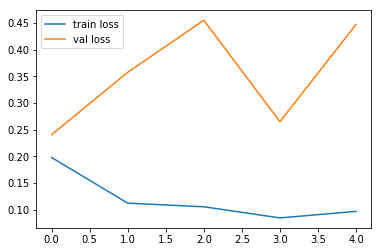

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


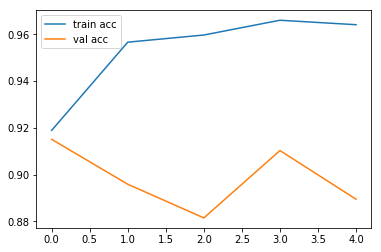

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [29]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')


# validation of model

In [30]:
from keras.models import load_model

In [33]:
img=image.load_img("C:/Users/admin/Desktop/datasets/chest_xray/val/NORMAL/img1.jpeg",target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
final_img=preprocess_input(img)
result=model.predict(final_img)
result

array([[1.0000000e+00, 1.3487379e-08]], dtype=float32)

In [34]:
img=image.load_img("C:/Users/admin/Desktop/datasets/chest_xray/val/PNEUMONIA/img2.jpeg",target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
final_img=preprocess_input(img)
result1=model.predict(final_img)
result1



array([[0., 1.]], dtype=float32)

In [37]:
import pandas as pd
df=pd.DataFrame(result)
df     #0=Normal & 1=Pneumonia 

,0,1
0,1.0,1.348738e-08


In [39]:
df1=pd.DataFrame(result1)
df1        

,0,1
0,0.0,1.0
